### Student Information
Name: 蔡宗達

Student ID: 1110200001

GitHub ID: da111020001-lab

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [12]:
### Begin Assignment Here

# ===============================================
# Phase 1 on New Dataset (Reddit-stock-sentiment.csv)
# ===============================================

# Step 1: Import Libraries
# test code for environment setup
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt') # download the NLTK datasets
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
# If you get "ModuleNotFoundError: No module named 'PAMI'"
# run the following in a new Jupyter cell:
# !pip3 install PAMI
import PAMI
import umap

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\da314\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# Step 2: Load the new dataset
df = pd.read_csv("newdataset/Reddit-stock-sentiment.csv")
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (847, 16)


,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0


In [14]:
# Step 3: Keep only relevant columns
# 我們只需要文字內容與情緒標籤
df = df[['text', 'label']].dropna(subset=['text'])

# 確保文字都是字串型態
df['text'] = df['text'].astype(str)

# 檢查是否還有空白或全為空字串的資料
empty_text = (df['text'].str.len() == 0).sum()
print(f"Empty text rows: {empty_text}")

print("Simplified dataset shape:", df.shape)
df.head()

Empty text rows: 0
Simplified dataset shape: (824, 2)


,text,label
0,Calls on retards,-1.0
1,Stunt as in like why did they even make a big ...,0.0
2,Seeing lots of red in the ticker.,0.0
3,Vision Marine Technologies Inc. is rewriting t...,1.0
4,He didn’t say thank you.,-1.0


In [15]:
# Step 4: Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# 檢查是否有空白字串（非 NaN 但內容為空）
empty_text_count = (df['text'].str.strip() == '').sum()
print(f"\nRows with empty text (after stripping spaces): {empty_text_count}")


Missing values per column:
text     0
label    0
dtype: int64

Rows with empty text (after stripping spaces): 0


In [5]:
# Step 5: Check for duplicates
duplicates = df.duplicated(subset=['text']).sum()
print(f"\nNumber of duplicate text records: {duplicates}")


Number of duplicate text records: 23


In [16]:
# Step 5: Check for duplicates
duplicates = df.duplicated(subset=['text']).sum()
print(f"\nNumber of duplicate text records: {duplicates}")

# 如果有重複，選擇保留第一筆、刪除其餘
if duplicates > 0:
    df = df.drop_duplicates(subset=['text']).reset_index(drop=True)
    print("Duplicates removed. New dataset shape:", df.shape)
else:
    print("No duplicates found.")


Number of duplicate text records: 0
No duplicates found.


In [18]:
# Step 6: Sampling (like in Phase 1)
# Create a smaller sample for testing visualization
X_sample = df.sample(frac=0.1, random_state=42)
print("Sample size:", X_sample.shape)
print("\nLabel distribution in sample:")
print(X_sample['label'].value_counts(normalize=True))

Sample size: (82, 2)

Label distribution in sample:
label
 0.0    0.439024
-1.0    0.329268
 1.0    0.231707
Name: proportion, dtype: float64


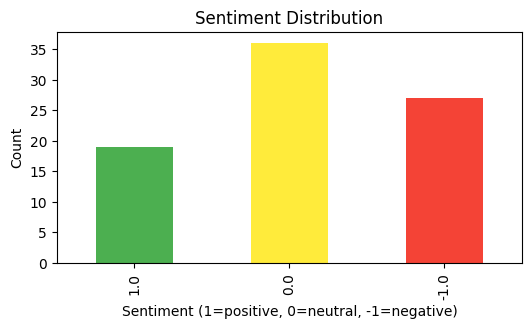

In [19]:
# Step 7: Plot category (sentiment) distribution
plt.figure(figsize=(6,3))

# 先把 label 順序固定（正向→中立→負向）
label_order = [1.0, 0.0, -1.0]
X_sample['label'].value_counts().reindex(label_order).plot(
    kind='bar',
    color=['#4caf50', '#ffeb3b', '#f44336'],
    title='Sentiment Distribution'
)

plt.xlabel('Sentiment (1=positive, 0=neutral, -1=negative)')
plt.ylabel('Count')
plt.show()


In [25]:
# Step 8: Feature Creation (token count)
vectorizer = CountVectorizer(
    lowercase=True, 
    stop_words='english', 
    min_df=5
)

X_counts = vectorizer.fit_transform(X_sample['text'])
print("Shape of Document-Term Matrix:", X_counts.shape)
print("Example feature names:", vectorizer.get_feature_names_out()[:10])

Shape of Document-Term Matrix: (82, 13)
Example feature names: ['company' 'doing' 'economy' 'just' 'like' 'market' 'people' 'right'
 'tariffs' 'time']



Top 20 most frequent terms:
       word  count
5    market     11
3      just      9
4      like      9
11    trump      9
0   company      8
9      time      7
2   economy      6
1     doing      6
6    people      5
8   tariffs      5
7     right      5
10    today      5
12     want      5


C:\Users\da314\AppData\Local\Temp\ipykernel_4676\1094156014.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='word', y='count', data=freq_df.head(20), palette='viridis')


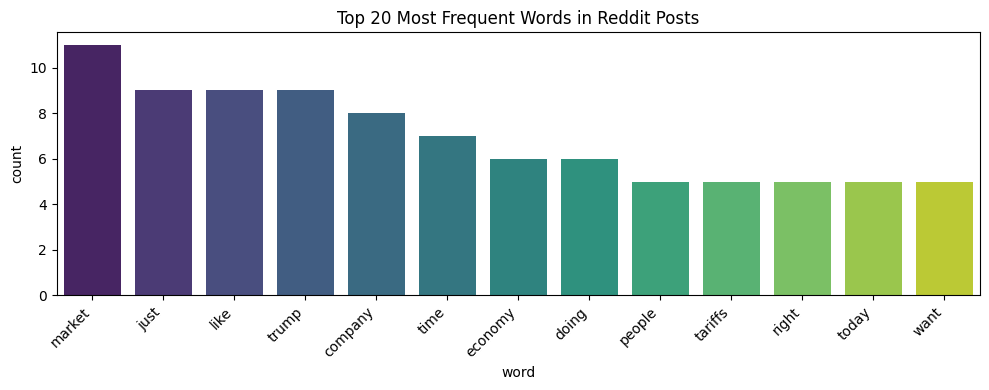

In [26]:
# Step 9: Check top 20 frequent terms
word_freq = np.asarray(X_counts.sum(axis=0)).flatten()
vocab = vectorizer.get_feature_names_out()
freq_df = pd.DataFrame({'word': vocab, 'count': word_freq})
freq_df = freq_df.sort_values(by='count', ascending=False)

print("\nTop 20 most frequent terms:")
print(freq_df.head(20))

plt.figure(figsize=(10,4))
sns.barplot(x='word', y='count', data=freq_df.head(20), palette='viridis')
plt.title('Top 20 Most Frequent Words in Reddit Posts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [27]:
from sklearn.model_selection import train_test_split

# Step 10: Split for future tasks (optional)
X_train, X_test, y_train, y_test = train_test_split(
    df['text'], df['label'], test_size=0.2, random_state=42, stratify=df['label']
)
print("Train size:", X_train.shape, "Test size:", X_test.shape)

# 檢查訓練集與測試集的標籤分布
print("\nLabel distribution in training set:")
print(y_train.value_counts(normalize=True))
print("\nLabel distribution in test set:")
print(y_test.value_counts(normalize=True))

Train size: (659,) Test size: (165,)

Label distribution in training set:
label
 0.0    0.487102
-1.0    0.382398
 1.0    0.130501
Name: proportion, dtype: float64

Label distribution in test set:
label
 0.0    0.484848
-1.0    0.381818
 1.0    0.133333
Name: proportion, dtype: float64


In [28]:
# Step 11: TF-IDF Feature Transformation
from sklearn.feature_extraction.text import TfidfVectorizer

# 建立 TF-IDF 向量器
tfidf_vectorizer = TfidfVectorizer(
    lowercase=True,
    stop_words='english',
    min_df=5,
    max_df=0.9,
    max_features=2000
)

# 套用在訓練集與測試集
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print("TF-IDF Matrix Shapes:")
print("Train:", X_train_tfidf.shape)
print("Test:", X_test_tfidf.shape)

# 查看前幾個詞彙
print("\nExample feature names:")
print(tfidf_vectorizer.get_feature_names_out()[:15])


TF-IDF Matrix Shapes:
Train: (659, 318)
Test: (165, 318)

Example feature names:
['10' '100' '12' '15' '20' '2025' '30' '50' '90' 'able' 'actual'
 'actually' 'administration' 'advice' 'ago']


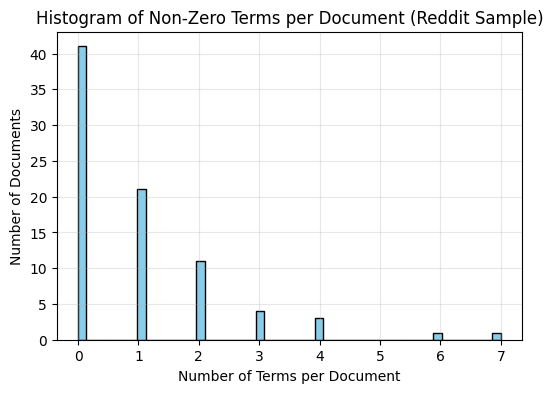

Average number of non-zero terms per document: 1.0
Sparsity: 0.9250


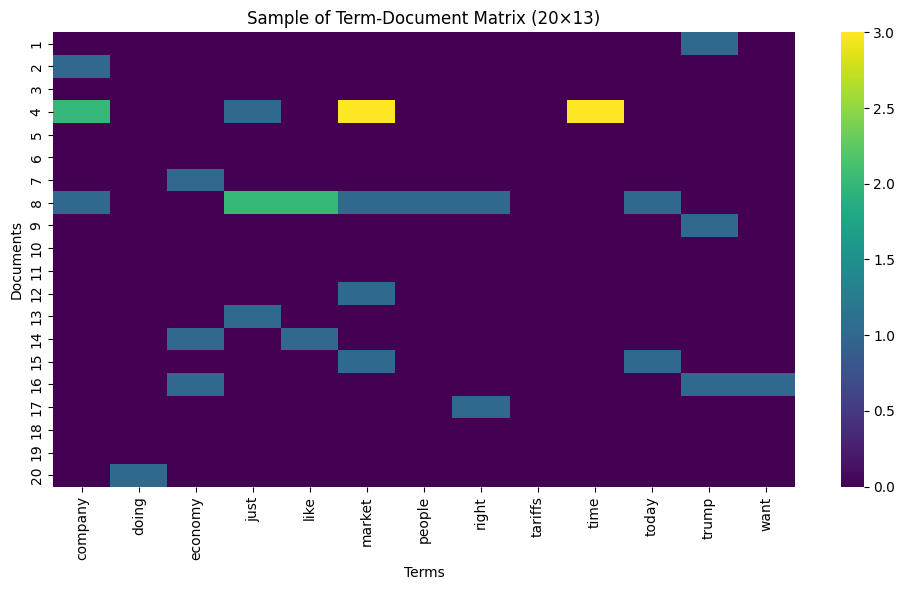

In [33]:
# Visualize sparsity of the term-document matrix
import matplotlib.pyplot as plt
import numpy as np

# 計算每一篇貼文中非零詞的數量
nonzero_per_doc = (X_counts > 0).sum(axis=1)
nonzero_per_doc = np.asarray(nonzero_per_doc).flatten()

plt.figure(figsize=(6,4))
plt.hist(nonzero_per_doc, bins=50, color='skyblue', edgecolor='k')
plt.title('Histogram of Non-Zero Terms per Document (Reddit Sample)')
plt.xlabel('Number of Terms per Document')
plt.ylabel('Number of Documents')
plt.grid(alpha=0.3)
plt.show()

print(f"Average number of non-zero terms per document: {nonzero_per_doc.mean():.1f}")
print(f"Sparsity: {1 - (X_counts.nnz / (X_counts.shape[0]*X_counts.shape[1])):.4f}")


import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# 自動取最小的 20 或實際可用的最大詞數，避免超出
n_docs = min(20, X_counts.shape[0])
n_terms = min(20, X_counts.shape[1])

sample_matrix = X_counts[:n_docs, :n_terms].toarray()
sample_terms = vectorizer.get_feature_names_out()[:n_terms]

plt.figure(figsize=(10, 6))
sns.heatmap(sample_matrix, cmap='viridis')

plt.title(f'Sample of Term-Document Matrix ({n_docs}×{n_terms})')
plt.xlabel('Terms')
plt.ylabel('Documents')

# 這裡改成自動根據實際詞數設定 tick
plt.xticks(np.arange(n_terms) + 0.5, sample_terms, rotation=90)
plt.yticks(np.arange(n_docs) + 0.5, np.arange(1, n_docs + 1))
plt.tight_layout()
plt.show()


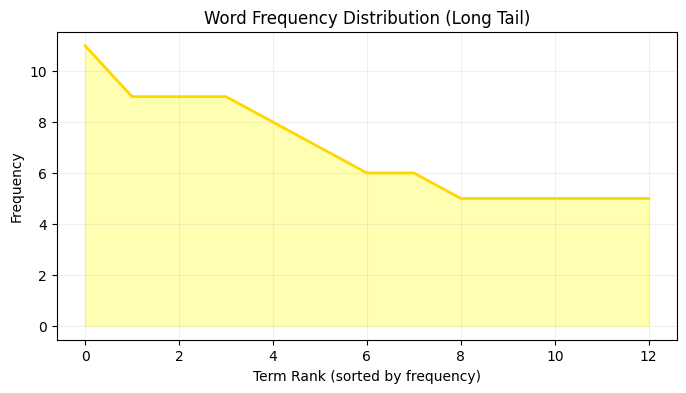

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# 確保 freq_df 已經照 count 排序過
freq_df_sorted = freq_df.sort_values(by='count', ascending=False).reset_index(drop=True)

plt.figure(figsize=(8, 4))
plt.plot(freq_df_sorted['count'].values, color='gold', linewidth=2)
plt.fill_between(range(len(freq_df_sorted)), freq_df_sorted['count'].values, color='yellow', alpha=0.3)

plt.title('Word Frequency Distribution (Long Tail)')
plt.xlabel('Term Rank (sorted by frequency)')
plt.ylabel('Frequency')
plt.grid(alpha=0.2)
plt.show()


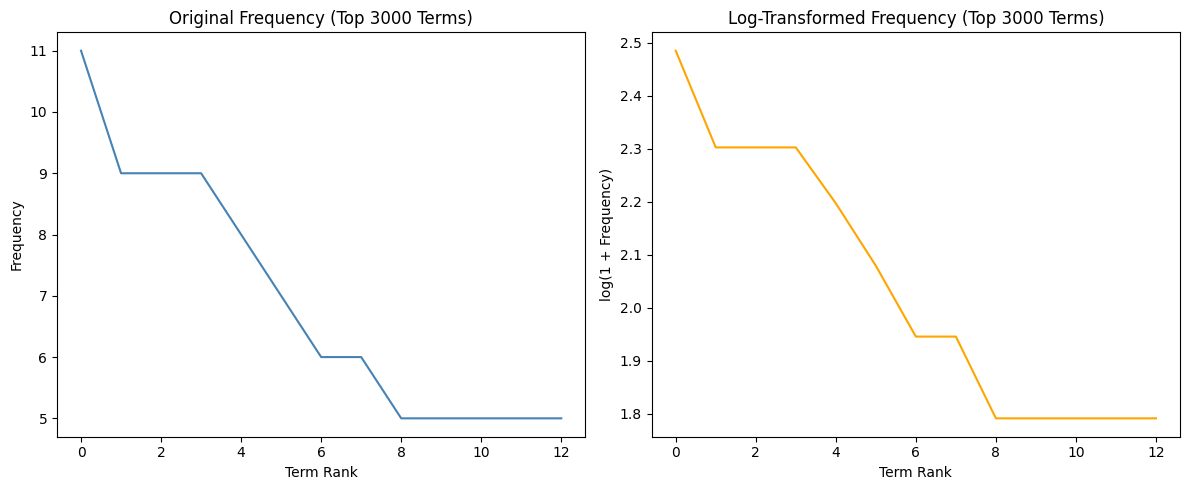

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: 對原始詞頻取 log(1 + frequency)
freq_df_sorted = freq_df.sort_values(by='count', ascending=False).reset_index(drop=True)
freq_df_sorted['log_count'] = np.log1p(freq_df_sorted['count'])

# Step 2: 畫出原始 vs log 轉換後的詞頻比較
plt.figure(figsize=(12, 5))

# 左圖：原始頻率
plt.subplot(1, 2, 1)
plt.plot(freq_df_sorted['count'][:3000], color='steelblue')
plt.title('Original Frequency (Top 3000 Terms)')
plt.xlabel('Term Rank')
plt.ylabel('Frequency')

# 右圖：log(1 + frequency)
plt.subplot(1, 2, 2)
plt.plot(freq_df_sorted['log_count'][:3000], color='orange')
plt.title('Log-Transformed Frequency (Top 3000 Terms)')
plt.xlabel('Term Rank')
plt.ylabel('log(1 + Frequency)')

plt.tight_layout()
plt.show()


# Phase 2

In [ ]:
### Begin Assignment Here